## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = merged_df['Mouse ID'].nunique()
print(mouse_count)


249


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_data = merged_df.loc[merged_df['Mouse ID'] == 'g989', :]
g989_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
clean_merge_df = merged_df.loc[merged_df['Mouse ID'] != 'g989', :]
clean_merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
mouse_count_two = clean_merge_df['Mouse ID'].nunique()
mouse_count_two

248

In [6]:
clean_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

######## NEED TO COMPLETE##########



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_regimen = clean_merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
grouped_regimen.describe()


Tumor Volume (mm3)                                            
                    mean     median        var        std        sem
count          10.000000  10.000000  10.000000  10.000000  10.000000
mean           50.975982  49.902123  47.858440   6.821103   0.502785
std             5.621289   4.705415  16.008423   1.216096   0.103473
min            40.216745  40.673236  23.486704   4.846308   0.320955
25%            52.388490  50.778739  40.249804   6.342952   0.475424
50%            53.060651  51.819532  46.192684   6.794337   0.530365
75%            54.183257  52.396036  60.738703   7.793357   0.579276
max            55.235638  53.698743  68.553577   8.279709   0.603860

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen = clean_merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
grouped_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## BAR AND PIE PLOTS

## Bar Plot using pandas

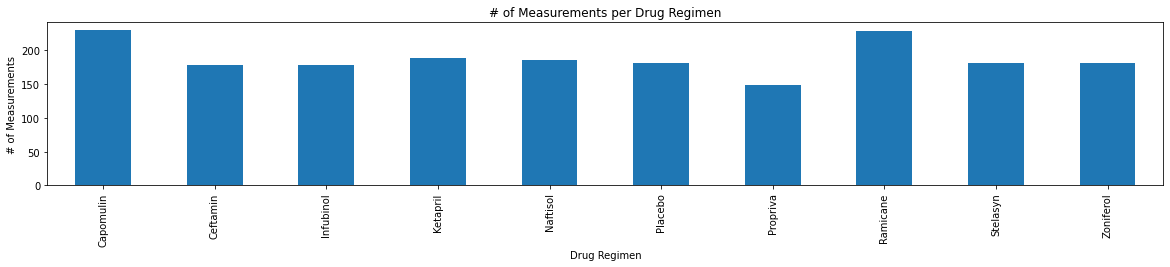

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_mouse_count = clean_merge_df.groupby('Drug Regimen')['Mouse ID'].count()
regimen_mouse_count_df = pd.DataFrame({
    'Number of Measurements': regimen_mouse_count
})

#regimen_mouse_count = clean_merge_df['Drug Regimen'].value_counts()

regimen_mouse_count_df.plot(kind='bar', figsize=(20,3))
plt.title('# of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Measurements')
plt.show()
plt.tight_layout()

## Bar Plot using Pyplot

<Figure size 1440x720 with 0 Axes>

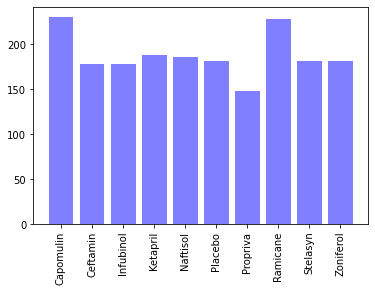

<Figure size 1440x720 with 0 Axes>

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# x_axis = np.arange(len(regimen_mouse_count_df))
# tick_locations = [value for value in x_axis]


plt.bar(regimen_mouse_count_df.index, regimen_mouse_count_df['Number of Measurements'], color='blue', alpha=0.5, align="center")
plt.xticks(regimen_mouse_count_df.index, rotation="vertical")
plt.figure(figsize=(20,10))

## Pie Plot using pandas

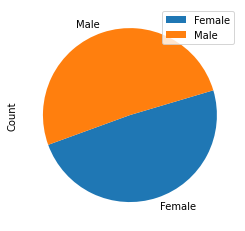

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create a dataframe to put count of each sex in
sex_grouped = clean_merge_df.groupby('Sex')['Mouse ID'].count()
mouse_sex_df = pd.DataFrame({
    'Count': sex_grouped,
})


plot = mouse_sex_df.plot.pie(y='Count', startangle=200)


## Pie Plot using Pyplot

In [12]:
sex_grouped = clean_merge_df.groupby('Sex')['Mouse ID'].nunique()
mouse_sex_df = pd.DataFrame({
    'Count': sex_grouped
})
mouse_sex_df

,Count
Sex,
Female,123
Male,125


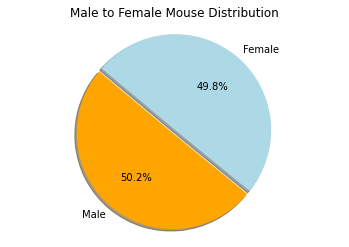

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = ['Male', "Female"]
count = [125, 124]
colors = ['Orange', 'lightBlue']
explode = (0, 0.04)

plt.title('Male to Female Mouse Distribution')
plt.pie(count, explode=explode, labels=gender, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_mouse = clean_merge_df.groupby('Mouse ID')['Timepoint'].max()
max_mouse
max_mouse_df = pd.DataFrame({
    'Timepoint': max_mouse
    
})

max_mouse_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_mouse_df = max_mouse_df.reset_index()
merge_max_mouse = pd.merge(max_mouse_df, clean_merge_df, how='left', on=['Mouse ID', 'Timepoint'])

merge_max_mouse.head()






,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_tumor_volume = merge_max_mouse.loc[merge_max_mouse['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
   
                        
        
    # add subset 
    tumor_data.append(treatment_tumor_volume)
    print(f'Tumor data for {treatment}: {tumor_data}')
    
    # Determine outliers using upper and lower bounds
    

# four_regimens = merge_max_mouse.loc[(merge_max_mouse['Drug Regimen'] == 'Capomulin') |
#                                     (merge_max_mouse['Drug Regimen'] == 'Ramicane') |
#                                     (merge_max_mouse['Drug Regimen'] == 'Infubinol') |
#                                     (merge_max_mouse['Drug Regimen'] == 'Ceftamin')]
# four_regimens
                                     
                                 


Tumor data for Capomulin: [19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64]
Tumor data for Ramicane: [19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407

In [16]:
# four_regimens.drop(columns='Timepoint_y')
# four_regimens.rename(columns={'Timepoint_x': 'Greatest Timepoint'})

,Mouse ID,Greatest Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1855,z581,45,Infubinol,Female,24,25,25,54.316407,2
1856,z581,45,Infubinol,Female,24,25,30,56.286750,2
1857,z581,45,Infubinol,Female,24,25,35,58.628399,3
1858,z581,45,Infubinol,Female,24,25,40,60.053740,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
